# Time Series Analaysis

# 1. Importing libraries

# 2. Importing data from Quandl

# 3. Subsetting, Cleaning and Wrangling Time Series data

# 4. Time-Series Analysis - Decomposition

# 5. Dickey - Fuller test

# 6. Stationarizing The data

# 7. Autocorrelation

# 1. Importing libraries

In [2]:
# Importing all the required libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

# Importing dataset from Quandl

In [3]:
# Configure API key

quandl.ApiConfig.api_key = 'NR4MmZsFa_XCpgnCuP7n'

In [4]:
# Importing the Organization of the Petroleum Exporting Countries - Daily pricing data for crude oil variable

data = quandl.get('FRED/GDP')

In [5]:
# Checking the dataframe
data.head()

,Value
Date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742


In [6]:
# Checking the total number of rows and columns
data.shape

(300, 1)

In [7]:
# Checking the columns in the dataframe
data.columns

Index(['Value'], dtype='object')

In [8]:
type(data)

pandas.core.frame.DataFrame

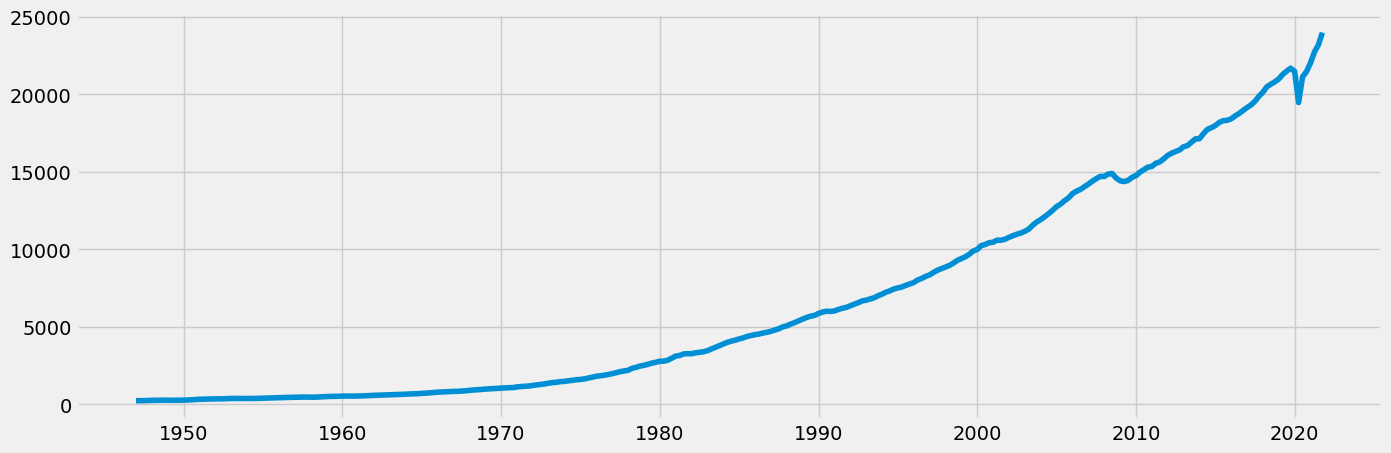

In [9]:
# Plot the data using matplotlib

plt.figure(figsize=(15,5), dpi = 100)

plt.plot(data)

# 3. Subsetting, Cleaning & Wrangling Time Series data

# I chose to take a subset of the data, and look for GDP from the years 1980 - 2020, as it would be relevant to the analysis and the years prior to that were not taken into account due to the change in the economic conditions.

In [10]:
# Reset index so that you can use the "Date" column as a filter

data_GDP = data.reset_index()

In [11]:
data_GDP.head()

,Date,Value
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [12]:
sub_GDP = data_GDP.loc[(data_GDP['Date'] >= '1980-01-01')]

In [13]:
sub_GDP.shape

(168, 2)

In [14]:
sub_GDP.head()

,Date,Value
132,1980-01-01,2789.842
133,1980-04-01,2797.352
134,1980-07-01,2856.483
135,1980-10-01,2985.557
136,1981-01-01,3124.206


In [15]:
# Set the date column as the index

from datetime import datetime
sub_GDP['datetime'] = pd.to_datetime(sub_GDP['Date']) # Creating a Datetime column from Date.
sub_GDP = sub_GDP.set_index('datetime')  # Setting the Datetime as the index of the dataframe.
sub_GDP.drop(['Date'], axis=1, inplace=True) # Drop the Date column.
sub_GDP.head()

,Value
datetime,
1980-01-01,2789.842
1980-04-01,2797.352
1980-07-01,2856.483
1980-10-01,2985.557
1981-01-01,3124.206


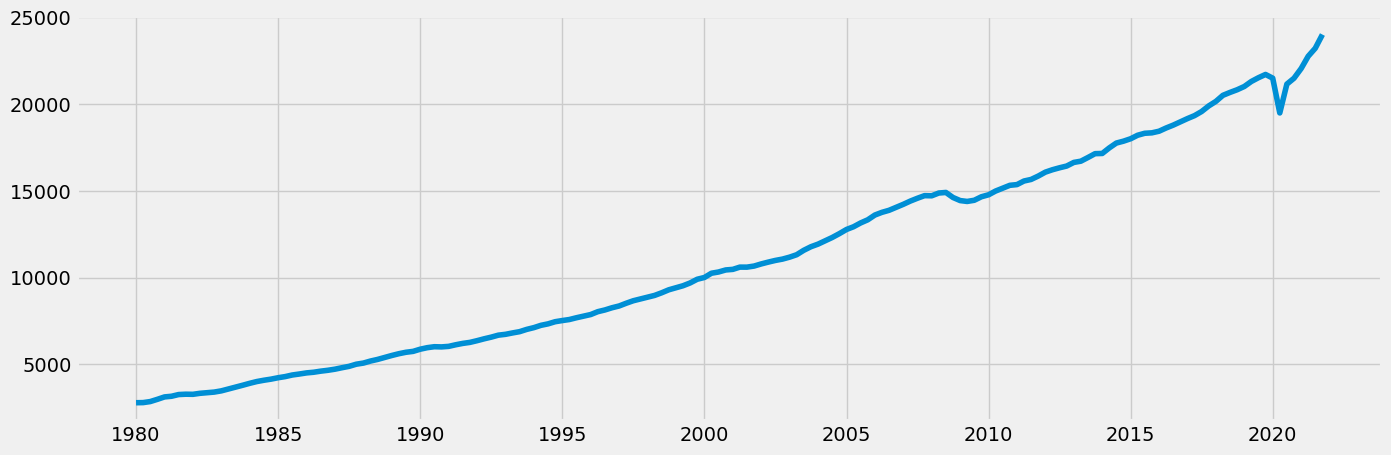

In [16]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(sub_GDP)

In [17]:
# Check for missing values (you shouldn't have any)

sub_GDP.isnull().sum()

Value    0
dtype: int64

In [18]:
# Check for duplicates

dups = sub_GDP.duplicated()
dups.sum()



0

# No duplicates found.

# 4. Time - Series Analysis: Decomposition

In [19]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(sub_GDP, model='additive')

In [20]:
from pylab import rcParams # Defines a fixed size for all special charts.\n",

rcParams['figure.figsize'] = 18, 7

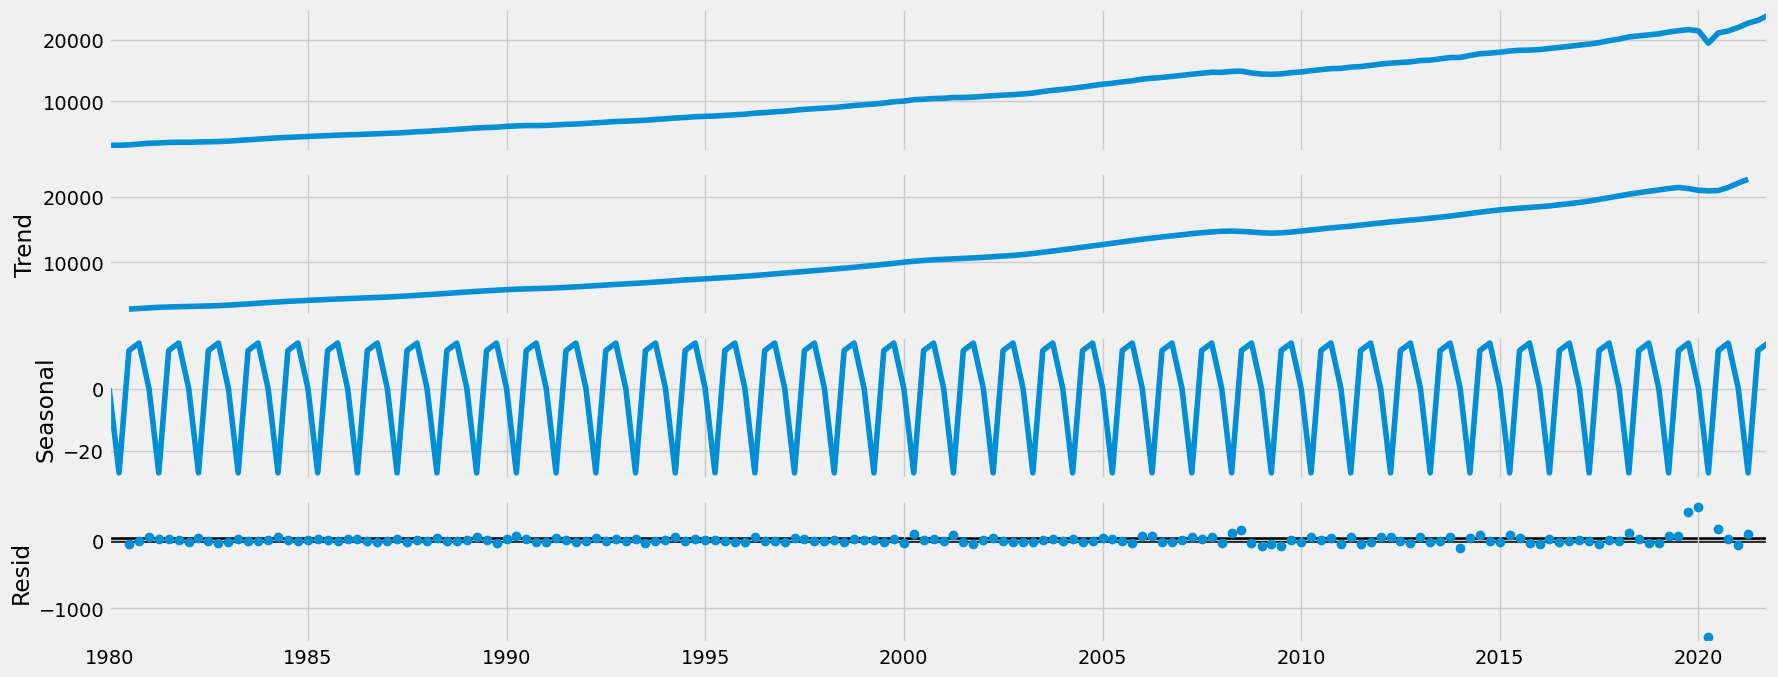

In [21]:
# Plot the separate components

decomposition.plot()
plt.show()

# There is an upward trend in the Gross Domestic Product data, and from the above decomposition plot, we can also see that there is seasonality present in the data, which is represented by the spiked curve that changes at regular intervals. The residual graph shows the noise in the data, as the points are mostly centered close to zero, there isn't much noise in this data.

# 5. Dickey-Fuller Test

In [30]:
# Import the adfuller() function
from statsmodels.tsa.stattools import adfuller 

# Define the function
def dickey_fuller(timeseries): 
    
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(sub_GDP['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                   3.629146
p-value                          1.000000
Number of Lags Used              8.000000
Number of Observations Used    159.000000
Critical Value (1%)             -3.472161
Critical Value (5%)             -2.879895
Critical Value (10%)            -2.576557
dtype: float64


# The test statistic value is larger than all the critical values, the null hypothesis can't be rejected, and the data has to be changed to stationary.

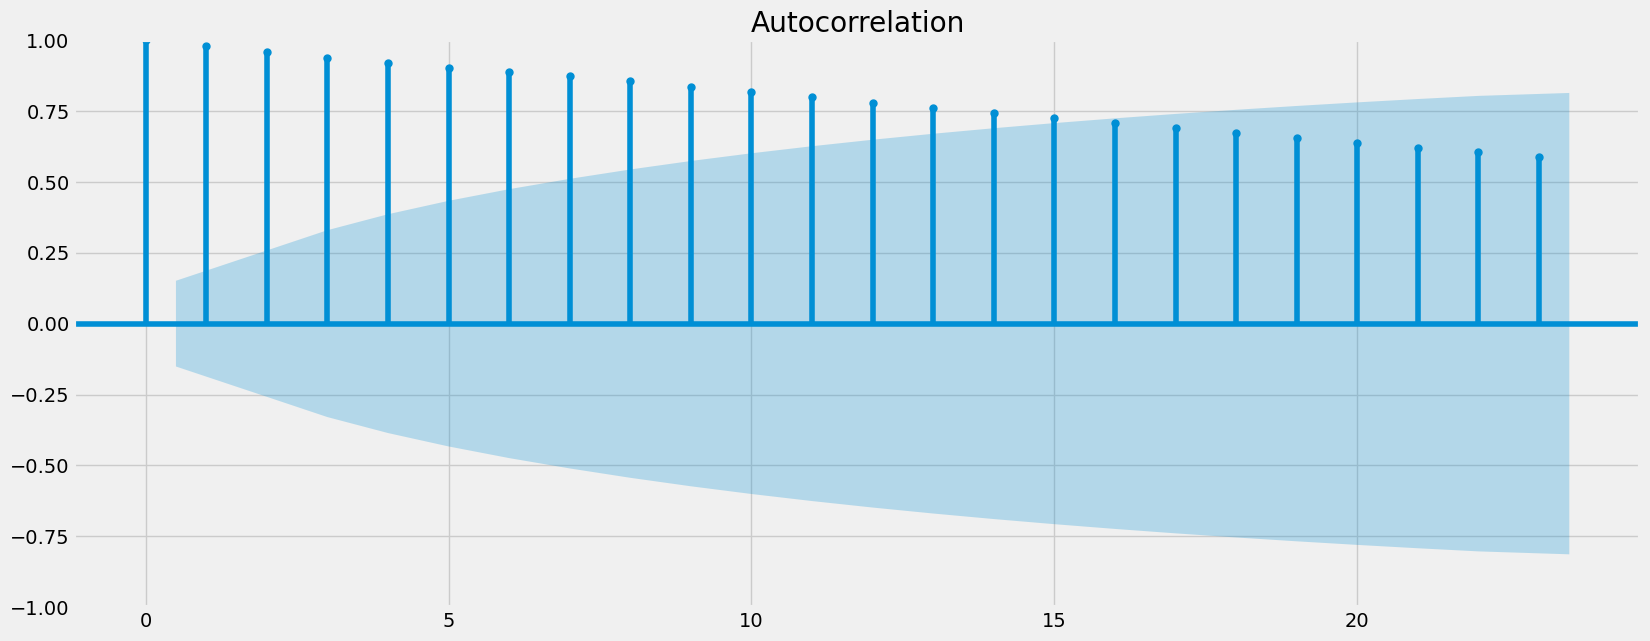

In [31]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Importing the autocorrelation and partial correlation plots

plot_acf(sub_GDP)
plt.show()

# This time series has many lags above the confidence interval, which indicates that there are quite a few lags correlated with each other or a lot of autocorrelated data and the set is non-stationary, which also supports the results of the Dickey-Fuller test.

# 6. Stationarizing the Data

In [32]:
data_diff = sub_GDP - sub_GDP.shift(1) 

In [33]:
# Remove missing values that come as a result of differencing
data_diff.dropna(inplace = True)

In [34]:
data_diff.head()

,Value
datetime,
1980-04-01,7.510
1980-07-01,59.131
1980-10-01,129.074
1981-01-01,138.649
1981-04-01,38.326


In [35]:
data_diff.columns

Index(['Value'], dtype='object')

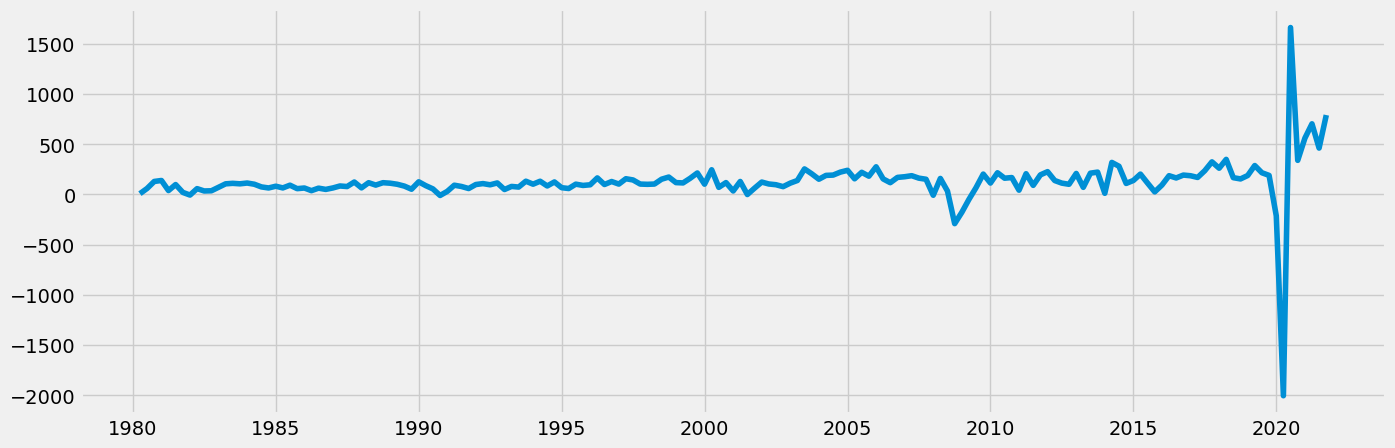

In [36]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [37]:
# Re-run the Dickey-Fuller test
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.388756e+01
p-value                        6.050630e-26
Number of Lags Used            0.000000e+00
Number of Observations Used    1.660000e+02
Critical Value (1%)           -3.470370e+00
Critical Value (5%)           -2.879114e+00
Critical Value (10%)          -2.576139e+00
dtype: float64


# The test statistic value is now smaller than all the critical values, which means that the null hypothesis can be ruled out and the data is stationary.

# 7. Autocorrelation

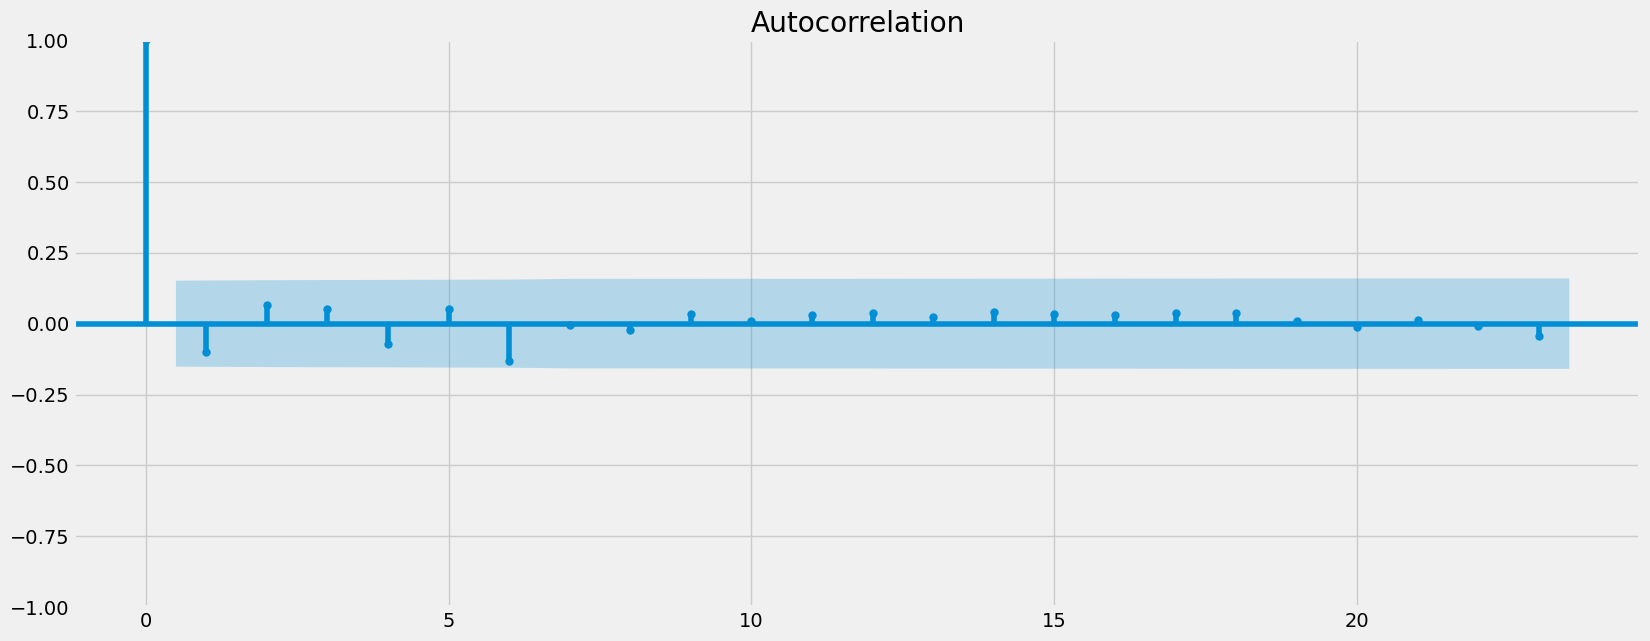

In [38]:
plot_acf(data_diff)
plt.show()

# From the above plot, there doesn't seem to be any lags above the confidence interval and also any kind of autocorrelated data, thereby indicating strong stationarity in the time-series data.